In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family'] = "serif"
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'chicago_nsrdb/*.csv'
files = glob.glob(path)
files.sort()
files

['chicago_nsrdb/commarea_10_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_11_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_12_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_13_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_14_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_15_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_16_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_17_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_18_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_19_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_1_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_20_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_21_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_22_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_23_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_24_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_25_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_26_weather_2000_2020.csv',
 'chicago_nsrdb/commarea_27_weather_2000_2020.csv',
 'chicago_nsr

In [3]:
heatwave_threshold = 32 # degrees celcius

In [4]:
def get_area_n(fname):
    """
    returns community area number
    """
    
    comm_n = fname.split('_')[2]
    
    return int(comm_n)

In [5]:
# concatenate temperature
frames = []
for f in files:
    n = get_area_n(f)
    df = pd.read_csv(f, 
                     usecols=['time',
                              f'Temp_{n}',
                              ],
                     index_col='time',
                     parse_dates=True
                     )
    frames.append(df)
full_df = pd.concat(frames, axis=1)

In [6]:
heatwaves = full_df.copy()

In [7]:
full_df['average'] = full_df.mean(axis=1)

In [8]:
full_df.head()

,Temp_10,Temp_11,Temp_12,Temp_13,Temp_14,Temp_15,Temp_16,Temp_17,Temp_18,Temp_19,...,Temp_72,Temp_73,Temp_74,Temp_75,Temp_76,Temp_77,Temp_7,Temp_8,Temp_9,average
time,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.051948
2000-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.051948
2000-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.090909
2000-01-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.038961
2000-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.038961


In [9]:
hot_times = full_df[full_df.average > heatwave_threshold]
hot_times.head()

,Temp_10,Temp_11,Temp_12,Temp_13,Temp_14,Temp_15,Temp_16,Temp_17,Temp_18,Temp_19,...,Temp_72,Temp_73,Temp_74,Temp_75,Temp_76,Temp_77,Temp_7,Temp_8,Temp_9,average
time,,,,,,,,,,,,,,,,,,,,,
2000-09-01 13:00:00,33.0,32.0,31.0,31.0,31.0,32.0,31.0,33.0,32.0,32.0,...,33.0,33.0,34.0,34.0,34.0,30.0,30.0,30.0,32.0,32.038961
2000-09-01 13:30:00,33.0,32.0,31.0,31.0,31.0,32.0,31.0,33.0,32.0,32.0,...,33.0,33.0,34.0,34.0,34.0,30.0,30.0,30.0,32.0,32.038961
2000-09-01 14:00:00,33.0,32.0,31.0,31.0,31.0,32.0,31.0,33.0,32.0,32.0,...,33.0,33.0,34.0,34.0,34.0,30.0,30.0,30.0,32.0,32.064935
2001-07-31 13:00:00,33.0,32.0,31.0,32.0,32.0,32.0,32.0,33.0,32.0,32.0,...,33.0,33.0,34.0,33.0,34.0,31.0,31.0,31.0,32.0,32.376623
2001-07-31 13:30:00,33.0,32.0,31.0,32.0,32.0,32.0,32.0,33.0,32.0,32.0,...,33.0,33.0,34.0,33.0,34.0,31.0,31.0,31.0,32.0,32.376623


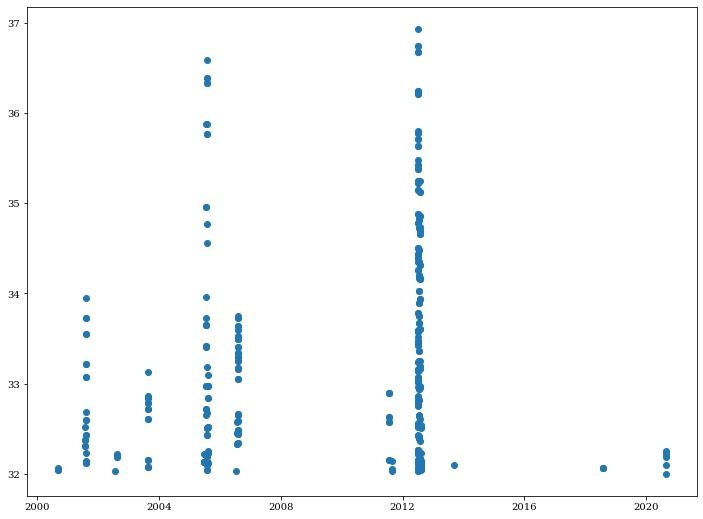

In [10]:
plt.scatter(x=hot_times.index, y=hot_times.average)

In [11]:
for col in full_df.columns:
    if col =='average':
        continue
    else:
        new_col = col+'_A'
        full_df[new_col] = (full_df[col] - full_df['average'])

In [12]:
full_df.head()

,Temp_10,Temp_11,Temp_12,Temp_13,Temp_14,Temp_15,Temp_16,Temp_17,Temp_18,Temp_19,...,Temp_71_A,Temp_72_A,Temp_73_A,Temp_74_A,Temp_75_A,Temp_76_A,Temp_77_A,Temp_7_A,Temp_8_A,Temp_9_A
time,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.051948,-0.051948,-0.051948,-0.051948,-0.051948,-0.051948,0.948052,-0.051948,-0.051948,-0.051948
2000-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.051948,-0.051948,-0.051948,-0.051948,-0.051948,-0.051948,0.948052,-0.051948,-0.051948,-0.051948
2000-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,-0.090909,0.909091,0.909091,-0.090909,-0.090909
2000-01-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.038961,-0.038961,-0.038961,-0.038961,-0.038961,-0.038961,0.961039,-0.038961,-0.038961,-0.038961
2000-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.038961,-0.038961,-0.038961,-0.038961,-0.038961,-0.038961,0.961039,-0.038961,-0.038961,-0.038961


In [13]:
for col in hot_times.columns:
    if col =='average':
        continue
    else:
        new_col = col+'_A'
        hot_times[new_col] = (hot_times[col] - hot_times['average'])

In [14]:
hot_times.head()

,Temp_10,Temp_11,Temp_12,Temp_13,Temp_14,Temp_15,Temp_16,Temp_17,Temp_18,Temp_19,...,Temp_71_A,Temp_72_A,Temp_73_A,Temp_74_A,Temp_75_A,Temp_76_A,Temp_77_A,Temp_7_A,Temp_8_A,Temp_9_A
time,,,,,,,,,,,,,,,,,,,,,
2000-09-01 13:00:00,33.0,32.0,31.0,31.0,31.0,32.0,31.0,33.0,32.0,32.0,...,0.961039,0.961039,0.961039,1.961039,1.961039,1.961039,-2.038961,-2.038961,-2.038961,-0.038961
2000-09-01 13:30:00,33.0,32.0,31.0,31.0,31.0,32.0,31.0,33.0,32.0,32.0,...,0.961039,0.961039,0.961039,1.961039,1.961039,1.961039,-2.038961,-2.038961,-2.038961,-0.038961
2000-09-01 14:00:00,33.0,32.0,31.0,31.0,31.0,32.0,31.0,33.0,32.0,32.0,...,0.935065,0.935065,0.935065,1.935065,1.935065,1.935065,-2.064935,-2.064935,-2.064935,-0.064935
2001-07-31 13:00:00,33.0,32.0,31.0,32.0,32.0,32.0,32.0,33.0,32.0,32.0,...,0.623377,0.623377,0.623377,1.623377,0.623377,1.623377,-1.376623,-1.376623,-1.376623,-0.376623
2001-07-31 13:30:00,33.0,32.0,31.0,32.0,32.0,32.0,32.0,33.0,32.0,32.0,...,0.623377,0.623377,0.623377,1.623377,0.623377,1.623377,-1.376623,-1.376623,-1.376623,-0.376623


In [15]:
heatwaves = heatwaves[heatwaves>heatwave_threshold]

In [16]:
heatwaves['hw_average'] = heatwaves.mean(axis=1)

In [17]:
for col in heatwaves.columns:
    if col =='hw_average':
        continue
    else:
        new_col = col+'_HA'
        heatwaves[new_col] = (heatwaves[col] - heatwaves['hw_average'])

In [18]:
N = len(files)

In [19]:
avg_ta = pd.DataFrame(hot_times.iloc[:,N+1:].mean(axis=0))
avg_ta.head()

,0
Temp_10_A,0.669552
Temp_11_A,0.135841
Temp_12_A,-0.996737
Temp_13_A,-0.438663
Temp_14_A,-0.438663


avg_ta = pd.DataFrame(heatwaves.iloc[:,N+1:].mean(axis=0))

avg_ta

In [20]:
get_comm_area = lambda c: int(c.split('_')[1])

In [21]:
avg_ta['commarea_n'] = avg_ta.index
avg_ta['commarea_n'] = avg_ta['commarea_n'].apply(get_comm_area)
avg_ta.reset_index(drop=True, inplace=True)
avg_ta.rename(columns={0:'H_a'}, inplace=True)
avg_ta['H_amin'] = avg_ta['H_a'] - avg_ta['H_a'].min()
avg_ta

,H_a,commarea_n,H_amin
0,0.669552,10,2.490652
1,0.135841,11,1.956941
2,-0.996737,12,0.824363
3,-0.438663,13,1.382436
4,-0.438663,14,1.382436
...,...,...,...
72,1.779751,76,3.600850
73,-1.761043,77,0.060057
74,-1.305235,7,0.515864
75,-1.252827,8,0.568272


In [22]:
chicago_shp = '../data_misc/chicago_shapefile/geo_export_2702d908-a4db-4dc5-a4de-78a5f3f67445.shp'
chicago_shp = '../data_misc/chicago_shapefile/geo_export_ec346dbb-8c11-44b4-be04-0301ae3f9c64.shp'
chicago = gp.read_file(chicago_shp)
chicago.geoid10 = chicago.geoid10.apply(np.int64)
chicago

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."
...,...,...,...,...,...,...,...,...,...,...
796,7,7.0,031,17031070400,704,Census Tract 704,None,17,070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932..."
797,7,7.0,031,17031070500,705,Census Tract 705,None,17,070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930..."
798,13,13.0,031,17031130300,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982..."
799,29,29.0,031,17031292200,2922,Census Tract 2922,None,17,292200,"POLYGON ((-87.71317 41.85523, -87.71357 41.855..."


In [23]:
chi_temp = pd.merge(chicago, avg_ta, on=['commarea_n'])
chi_temp

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,H_a,H_amin
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",0.691932,2.513031
1,44,44.0,031,17031440201,4402.01,Census Tract 4402.01,None,17,440201,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",0.691932,2.513031
2,44,44.0,031,17031440202,4402.02,Census Tract 4402.02,None,17,440202,"POLYGON ((-87.60852 41.73660, -87.60875 41.736...",0.691932,2.513031
3,44,44.0,031,17031440102,4401.02,Census Tract 4401.02,None,17,440102,"POLYGON ((-87.59956 41.74540, -87.59890 41.745...",0.691932,2.513031
4,44,44.0,031,17031440101,4401.01,Census Tract 4401.01,None,17,440101,"POLYGON ((-87.59890 41.74541, -87.59956 41.745...",0.691932,2.513031
...,...,...,...,...,...,...,...,...,...,...,...,...
796,12,12.0,031,17031120200,1202,Census Tract 1202,None,17,120200,"POLYGON ((-87.74884 41.98364, -87.74906 41.983...",-0.996737,0.824363
797,62,62.0,031,17031620300,6203,Census Tract 6203,None,17,620300,"POLYGON ((-87.72310 41.79094, -87.72309 41.790...",0.580884,2.401983
798,62,62.0,031,17031620400,6204,Census Tract 6204,None,17,620400,"POLYGON ((-87.71312 41.78609, -87.71326 41.786...",0.580884,2.401983
799,62,62.0,031,17031620100,6201,Census Tract 6201,None,17,620100,"POLYGON ((-87.71347 41.79565, -87.71347 41.795...",0.580884,2.401983


In [24]:
print(avg_ta['H_a'].max())
print(avg_ta['H_a'].min())

1.779750561053678
-1.8210992973032631


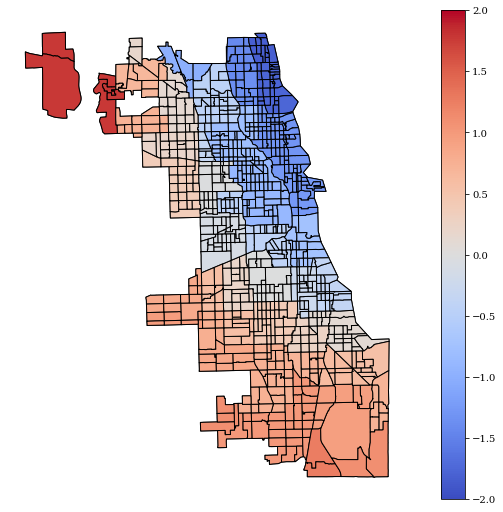

In [25]:
ax = chicago.plot(color='w', edgecolor='k')
# chi_temp.plot(ax=ax,edgecolor='k', column='H_a', cmap='coolwarm', vmin=-1.5, vmax=1.5,legend=True)
chi_temp.plot(ax=ax,edgecolor='k', column='H_a', cmap='coolwarm',vmin=-2, vmax=2,legend=True)
ax.set_axis_off()

<AxesSubplot:>

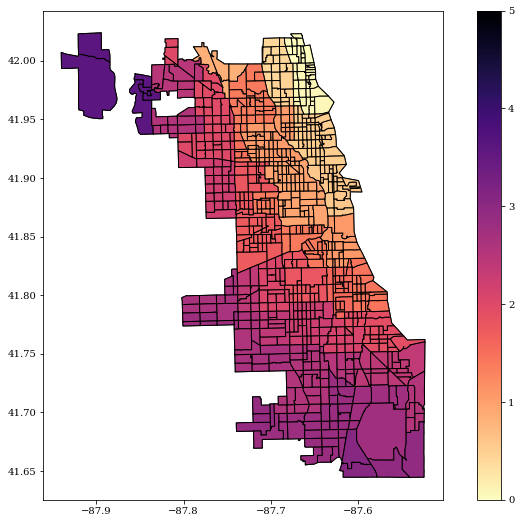

In [26]:
ax = chicago.plot(color='w', edgecolor='k')
chi_temp.plot(ax=ax,edgecolor='k', column='H_amin', cmap='magma_r', vmin=0, vmax=5,legend=True)

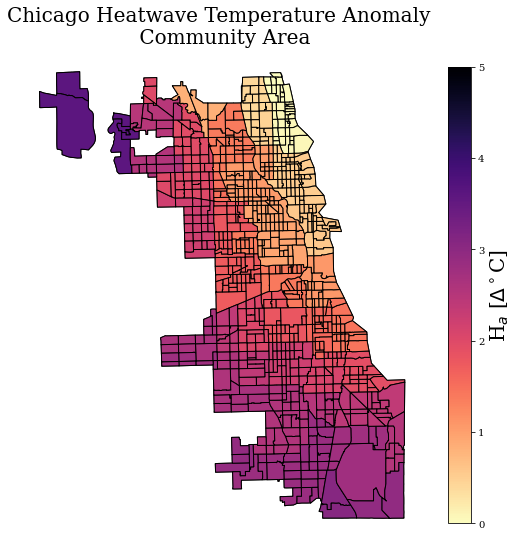

In [27]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=5)
cmap = 'magma_r'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago.plot(ax=ax, color='w',edgecolor='k', legend=False)
chi_temp.plot(ax=ax, edgecolor='k',column='H_amin', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'H$_a$ [$\Delta^\circ$C]', fontsize=20)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Heatwave Temperature Anomaly \n Community Area', fontsize=20)
ax.set_axis_off()

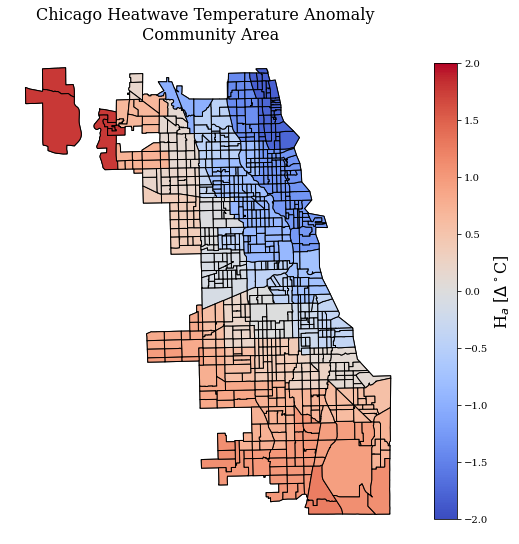

In [28]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=-2, vmax=2)
cmap = 'coolwarm'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago.plot(ax=ax, color='w',edgecolor='k', legend=False)
chi_temp.plot(ax=ax, edgecolor='k',column='H_a', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'H$_a$ [$\Delta^\circ$C]', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Heatwave Temperature Anomaly \n Community Area', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/temperature_anomaly_map.eps', format='eps')

In [29]:
chicago.set_index('geoid10')

,commarea,commarea_n,countyfp10,name10,namelsad10,notes,statefp10,tractce10,geometry
geoid10,,,,,,,,,
17031842400,44,44.0,031,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
17031840300,59,59.0,031,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
17031841100,34,34.0,031,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
17031841200,31,31.0,031,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
17031839000,32,32.0,031,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."
...,...,...,...,...,...,...,...,...,...
17031070400,7,7.0,031,704,Census Tract 704,None,17,070400,"POLYGON ((-87.65746 41.93258, -87.65722 41.932..."
17031070500,7,7.0,031,705,Census Tract 705,None,17,070500,"POLYGON ((-87.66349 41.93036, -87.66350 41.930..."
17031130300,13,13.0,031,1303,Census Tract 1303,None,17,130300,"POLYGON ((-87.71436 41.98300, -87.71472 41.982..."
